# 05 Example: Cross-Sectional Analysis
___
## Setup
import all the nedded libraries and files

In [1]:
import numpy as np

from Structure import *
from Material import *
from Plotting_Functions import *

## Generate the Geometry and the corresponding mesh

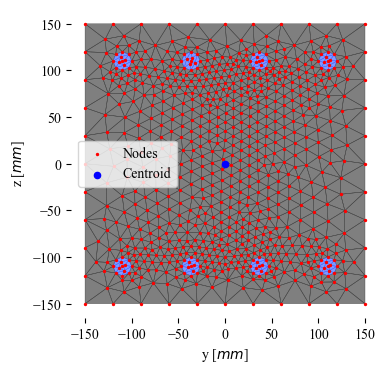

╒════════════════════╤══════════╕
│ Mesh Type          │ triangle │
├────────────────────┼──────────┤
│ Number of elements │ 1480     │
├────────────────────┼──────────┤
│ Number of nodes    │ 769      │
├────────────────────┼──────────┤
│ Cross Section Area │ 90000.00 │
╘════════════════════╧══════════╛
╒══════════════════════════╤══════════╤══════════╕
│                          │ y        │ z        │
╞══════════════════════════╪══════════╪══════════╡
│ Centroid [mm]            │ 0.00     │ 0.00     │
├──────────────────────────┼──────────┼──────────┤
│ Moment of inertia [mm^4] │ 6.75e+08 │ 6.75e+08 │
╘══════════════════════════╧══════════╧══════════╛


In [2]:
ReinforcedConcrete = ReinforcedConcreteColumn(width  = 300, 
                                              height = 300, 
                                              concrete_cover = 30,
                                              rebar_diameter = 20,
                                              rebar_spacing  = 50)
mesh = Mesh(ReinforcedConcrete, "triangle", 30)

mesh.plot()
mesh.print()

## Setup Analysis

In [3]:
Analysis = stress_strain_analysis(mesh)

## Apply some given strains

N  = 68.78 kN
My = 19.40 kNm
Mz = 3.56 kNm


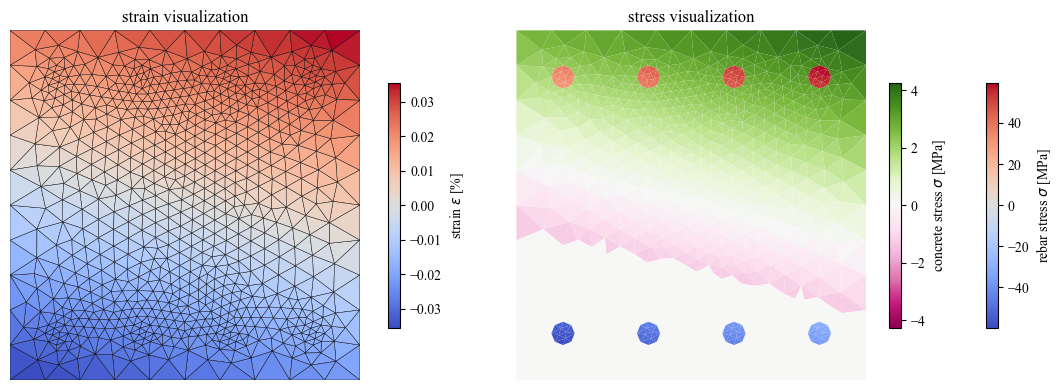

In [4]:
eps_x, chi_y, chi_z = 0, 0.000002, 0.0000005
# eps_x, chi_y, chi_z = 0, 0.00002, 0.000005

N, My, Mz = Analysis.get_section_forces(eps_x, chi_y, chi_z)

print("N  = {:.2f} kN".format(N))
print("My = {:.2f} kNm".format(My))
print("Mz = {:.2f} kNm".format(Mz))

plot_stress_strain_RC(Analysis)

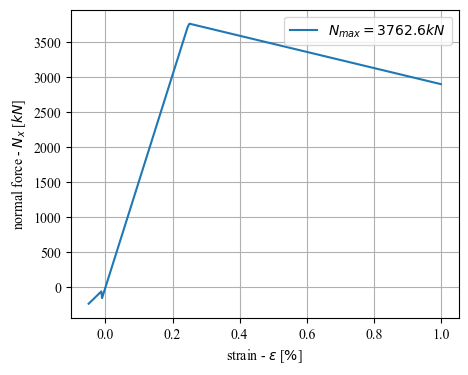

In [5]:
strains = np.linspace(-0.0005, 0.01, 500)
plot_linear_variation_eps(Analysis, strains)

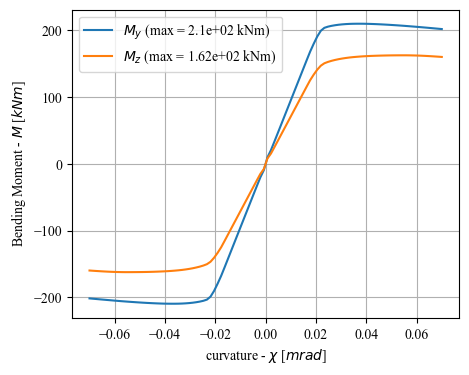

In [6]:
curvs = np.linspace(-0.00007, 0.00007, 100)
plot_linear_variation_curv(Analysis, curvs)

## Apply some given section forces

eps_x = -8.87e-05
chi_y = 2.08e-05
chi_z = -4.62e-10


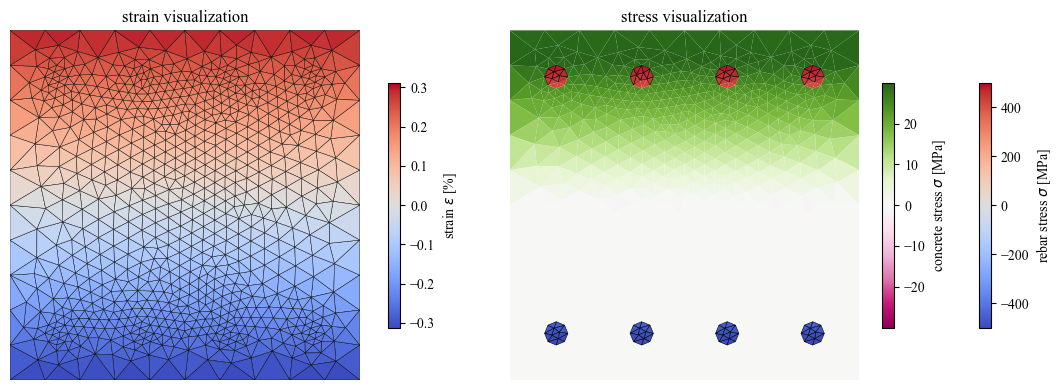

In [7]:
from math import log10, floor
def round_to_significant(x):
	return round(x, -int(floor(log10(abs(x/100)))))

N  =  700  # kN
My =  190  # kNm
Mz =  0    # kNm

eps_x, chi_y, chi_z = Analysis.get_strain_and_curvatures(N, My, Mz)

eps_x, chi_y, chi_z = round_to_significant(eps_x), round_to_significant(chi_y), round_to_significant(chi_z)

print("eps_x = {:.2e}".format(eps_x))
print("chi_y = {:.2e}".format(chi_y))
print("chi_z = {:.2e}".format(chi_z))


Analysis.set_strain_and_curvature(eps_x, chi_y, chi_z)
plot_stress_strain_RC(Analysis)

### $N-M$ and $M_y-M_z$ influence plots

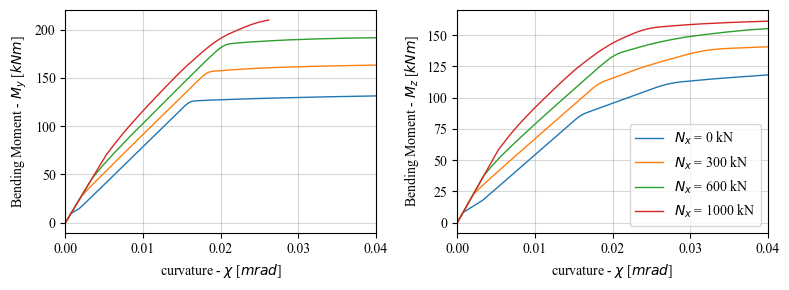

In [8]:
N = [0, 300, 600, 1000]
My_lim = [0, 250]
Mz_lim = [0, 250]
plot_influence_of_N_on_M(Analysis, N, My_lim, Mz_lim, False)

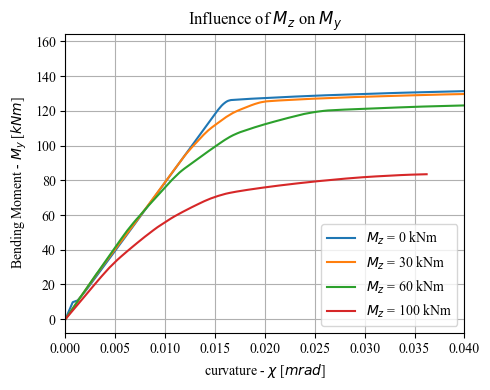

In [9]:
Mz = [0, 30, 60, 100]
My_lim = [0, 250]
plot_influence_of_Mz_on_My(Analysis, My_lim, Mz, False)